<h1> <center> Second Lab <h1>

<h4>1- OF course, always the exhaustive search takes SO MUCH more time and iterations<h4>
</nh4>2- From the iteration perspective, Golden section search is not necessarily better than Dichotomy search, it depends on the function shape and derivative.<h4>
</nh4>3- Using the optimized method of Golden section search (i.e. by resuing points from the previous iteration), would drastically decrease the complexity by minimizing the number of need function evaluations.

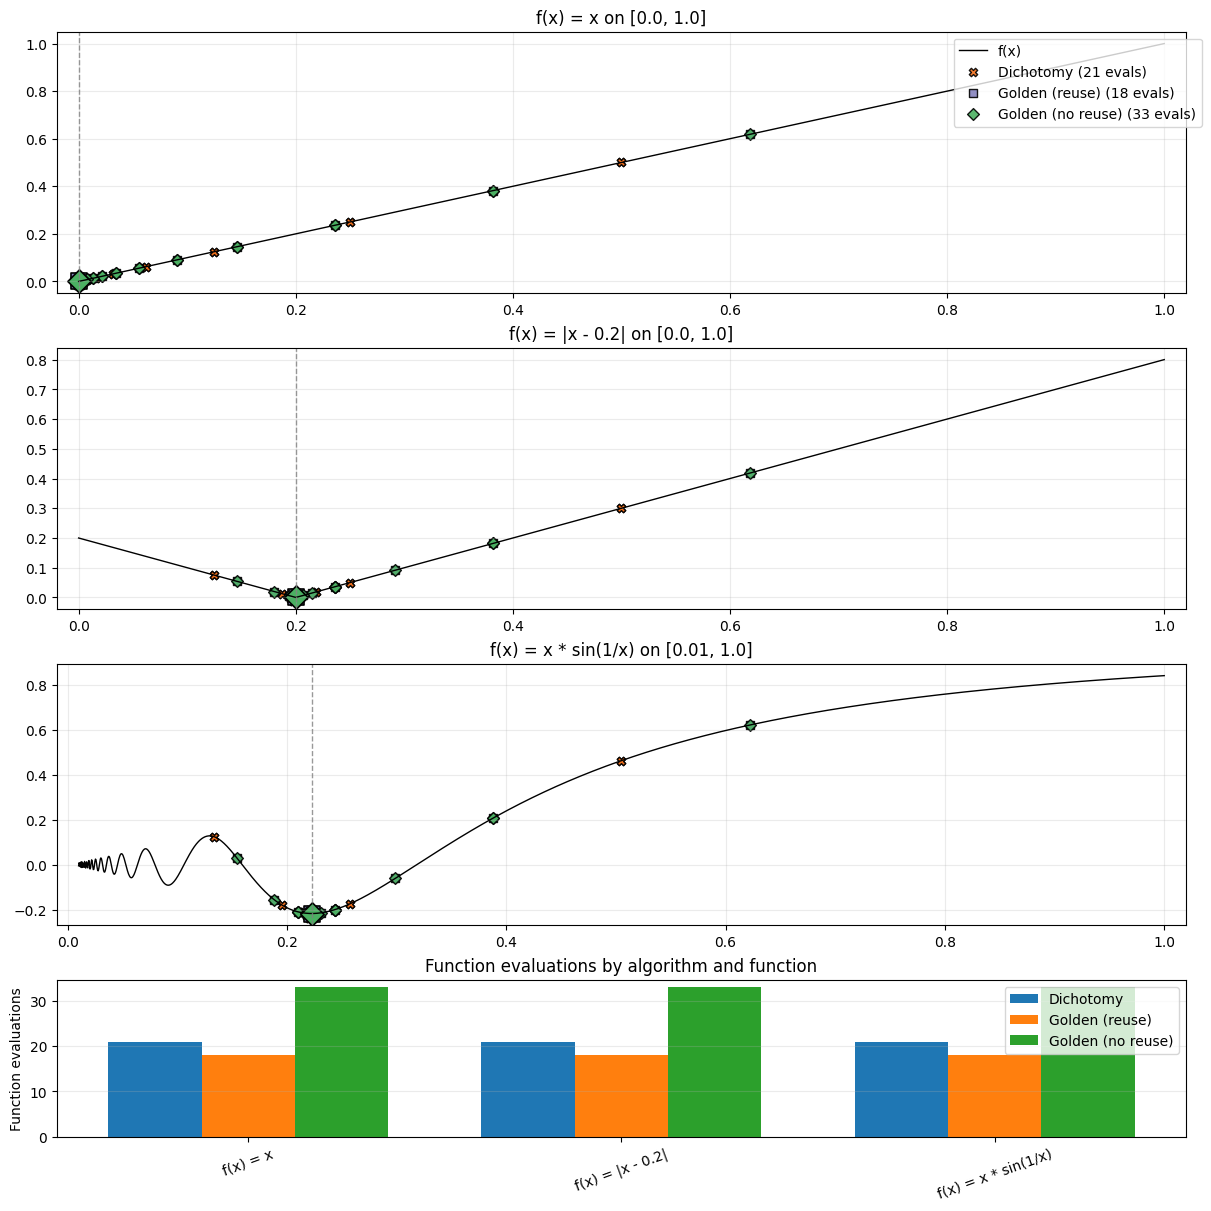

Function-evaluations table (rows = functions):
Function                                         Dichotomy        Golden (reuse)     Golden (no reuse)
f(x) = x                                                21                    18                    33
f(x) = |x - 0.2|                                        21                    18                    33
f(x) = x * sin(1/x)                                     21                    18                    33

Iterations table (rows = functions):
Function                                         Dichotomy        Golden (reuse)     Golden (no reuse)
f(x) = x                                                10                    15                    15
f(x) = |x - 0.2|                                        10                    15                    15
f(x) = x * sin(1/x)                                     10                    15                    15


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def exhaustive_search(f, a, b, eps):
    x_vals = np.arange(a, b + eps, eps)
    tested_x = []
    f_evals = 0
    min_x = x_vals[0]
    min_val = f(min_x)
    tested_x.append(min_x);
    f_evals += 1
    for x in x_vals[1:]:
        val = f(x);
        tested_x.append(x);
        f_evals += 1
        if val < min_val:
            min_val = val;
            min_x = x
    iterations = f_evals
    return min_x, min_val, iterations, f_evals, np.array(tested_x)

def dichotomy(f, a, b, eps, delta=1e-5):
    iterations = 0;
    f_evals = 0;
    tested_x = []
    while (b - a) > eps:
        mid = (a + b) / 2
        x1 = mid - delta;
        x2 = mid + delta
        f1 = f(x1);
        f2 = f(x2)
        tested_x.extend([x1, x2]);
        f_evals += 2;
        iterations += 1
        if f1 < f2:
            b = x2
        else:
            a = x1
    x_min = (a + b) / 2
    f_min = f(x_min);
    tested_x.append(x_min);
    f_evals += 1
    return x_min, f_min, iterations, f_evals, np.array(tested_x)

def golden_section(f, a, b, eps):
    phi = (1 + np.sqrt(5)) / 2
    resphi = 2 - phi
    iterations = 0;
    f_evals = 0;
    tested_x = []
    x1 = a + resphi * (b - a);
    x2 = b - resphi * (b - a)
    f1 = f(x1);
    f2 = f(x2);
    tested_x.extend([x1, x2]);
    f_evals += 2
    while abs(b - a) > eps:
        iterations += 1
        if f1 < f2:
            b = x2
            x2 = x1;
            f2 = f1
            x1 = a + resphi * (b - a)
            f1 = f(x1);
            tested_x.append(x1)
        else:
            a = x1
            x1 = x2;
            f1 = f2
            x2 = b - resphi * (b - a)
            f2 = f(x2);
            tested_x.append(x2)
        f_evals += 1
    x_min = (a + b) / 2;
    f_min = f(x_min);
    tested_x.append(x_min);
    f_evals += 1
    return x_min, f_min, iterations, f_evals, np.array(tested_x)

def golden_no_reuse(f, a, b, eps):
    phi = (1 + np.sqrt(5)) / 2
    resphi = 2 - phi
    iterations = 0;
    f_evals = 0;
    tested_x = []
    x1 = a + resphi * (b - a);
    x2 = b - resphi * (b - a)
    f1 = f(x1);
    f2 = f(x2);
    tested_x.extend([x1, x2]);
    f_evals += 2
    while abs(b - a) > eps:
        iterations += 1
        if f1 < f2:
            b = x2
        else:
            a = x1
        x1 = a + resphi * (b - a);
        x2 = b - resphi * (b - a)
        f1 = f(x1);
        f2 = f(x2);
        tested_x.extend([x1, x2]);
        f_evals += 2
    x_min = (a + b) / 2;
    f_min = f(x_min);
    tested_x.append(x_min);
    f_evals += 1
    return x_min, f_min, iterations, f_evals, np.array(tested_x)

f1 = lambda x: x
f2 = lambda x: np.abs(x - 0.2)
f3 = lambda x: x * np.sin(1 / x)
functions = [
    ("f(x) = x", f1, 0.0, 1.0),
    ("f(x) = |x - 0.2|", f2, 0.0, 1.0),
    ("f(x) = x * sin(1/x)", f3, 0.01, 1.0)
]

eps = 1e-3

algos = [
    ("Dichotomy", dichotomy, mpl.cm.Oranges, "X"),
    ("Golden (reuse)", golden_section, mpl.cm.Purples, "s"),
    ("Golden (no reuse)", golden_no_reuse, mpl.cm.Greens, "D"),
]

results = {fname: {"fevals": [], "iters": []} for fname, _, _, _ in functions}
per_func_algo_tested = {}

n_funcs = len(functions)
fig = plt.figure(constrained_layout=True, figsize=(12, 3 * n_funcs + 3))
gs = fig.add_gridspec(n_funcs + 1, 1, height_ratios=[1] * n_funcs + [0.6])

for i, (fname, f, a, b) in enumerate(functions):
    ax = fig.add_subplot(gs[i, 0])
    xs = np.linspace(a, b, 2000)
    ax.plot(xs, f(xs), color="black", lw=1, label="f(x)")

    per_func_algo_tested[fname] = {}

    for alg_name, alg_func, cmap, marker in algos:
        x_min, f_min, iters, fevals, tested = alg_func(f, a, b, eps)
        results[fname]["fevals"].append(fevals)
        results[fname]["iters"].append(iters)
        per_func_algo_tested[fname][alg_name] = tested
        color = cmap(0.6)
        ax.scatter(tested, f(tested), s=36, facecolors=color, edgecolors="k", marker=marker, alpha=0.9,
                   label=f"{alg_name} ({fevals} evals)")
        ax.scatter([x_min], [f_min], facecolors=color, edgecolors='k', s=140, marker=marker, linewidth=1.2)

    xs_ref = np.linspace(a, b, 20001)
    ref_x = xs_ref[np.nanargmin(f(xs_ref))]
    ax.axvline(ref_x, color='gray', linestyle='--', linewidth=1.0, alpha=0.8)

    ax.set_title(fname + f" on [{a}, {b}]")
    ax.set_xlim(a - 0.02 * (b - a), b + 0.02 * (b - a))
    ax.grid(alpha=0.25)
    if i == 0:
        ax.legend(loc='upper right', bbox_to_anchor=(1.02, 1.0))

ax_summary = fig.add_subplot(gs[n_funcs, 0])
x = np.arange(n_funcs)
width = 0.25
for j, (alg_name, _, _, _) in enumerate(algos):
    fevals = [results[fname]["fevals"][j] for fname, _, _, _ in functions]
    ax_summary.bar(x + (j - (len(algos) - 1) / 2) * width, fevals, width=width, label=alg_name)
ax_summary.set_xticks(x)
ax_summary.set_xticklabels([fname for fname, _, _, _ in functions], rotation=20)
ax_summary.set_ylabel("Function evaluations")
ax_summary.set_title("Function evaluations by algorithm and function")
ax_summary.legend()
ax_summary.grid(axis='y', alpha=0.25)

plt.show()

algos_simple = [(name, None) for name, _, _, _ in algos]
print("Function-evaluations table (rows = functions):")
header = "Function".ljust(36)
for alg_name, _ in algos_simple:
    header += f"{alg_name:>22}"
print(header)
for idx, fname in enumerate([fname for fname, _, _, _ in functions]):
    row = fname.ljust(36)
    for j, (alg_name, _, _, _) in enumerate(algos):
        row += f"{results[fname]['fevals'][j]:22d}"
    print(row)

print("\nIterations table (rows = functions):")
header = "Function".ljust(36)
for alg_name, _ in algos_simple:
    header += f"{alg_name:>22}"
print(header)
for idx, fname in enumerate([fname for fname, _, _, _ in functions]):
    row = fname.ljust(36)
    for j, (alg_name, _, _, _) in enumerate(algos):
        row += f"{results[fname]['iters'][j]:22d}"
    print(row)


<h1> <center> The Second Part "Minimization" <h1>

<h3> Defining the modules <h3>

In [108]:
# Models
def linear_model(x, a, b):
    return a * x + b
def rational_model(x, a, b):
    return a / (1 + b * x)

<h3> Defining the error function <h3>

In [109]:
# Loss function
def loss(f, a, b, x, y):
    return np.sum((f(x, a, b) - y) ** 2)

<h3> Two-dimensional Exhautive search <h3>

In [110]:
# Exhaustive 2D grid search
def two_dim_exhaus(f, a0, a1, b0, b1, x, y, eps=1e-3):
    A_tr = np.arange(a0, a1, eps)
    B_tr = np.arange(b0, b1, eps)
    a_best, b_best = -1, -1
    min_val = 1e+3
    for q1 in A_tr:
        for q2 in B_tr:
            z = loss(f, q1, q2, x, y)
            if z < min_val:
                min_val = z
                a_best, b_best = q1, q2

    return a_best, b_best, min_val

<h3>  Coordinate descent search <h3>

In [111]:
# Coordinate descent with alternating exhaustive search
def coordinate_descent(f, x, y, init_a, init_b, eps=1e-3):
    def exhaustive_search_2(f, a, b, x, y, var):
        if var == 0:
            a_vals = np.arange(a-1, a + 1, 1e-3)
            min_a = a_vals[0]
            min_val = loss(f, min_a, b, x, y)
            for z in a_vals[1:]:
                val = loss(f, z, b, x, y)
                if val < min_val:
                    min_val = val
                    min_a = z
            return min_a, b, 1
        else:
            b_vals = np.arange(b-1, b + 1, 1e-3)
            min_b = b_vals[0]
            min_val = loss(f, a, min_b, x, y)
            for z in b_vals[1:]:
                val = loss(f, a, z, x, y)
                if val < min_val:
                    min_val = val
                    min_b = z
            return  a, min_b, 0

    a, b = 1e+3, 1e+3
    a_best, b_best = init_a, init_b
    var = 0
    while abs(a_best - a) > eps or abs(b_best - b) > eps:
        a, b = a_best, b_best
        a_best, b_best, var = exhaustive_search_2(f, a, b, x, y, var)
    return a_best, b_best


In [112]:
# Nelder-Mead optimization
def nelder_mead(f, arr, x, y):
    def cal_loss(f, x, y, arr):
        return np.array([loss(f, p[0], p[1], x, y) for p in arr])

    def mysort(f, x, y, simplex_arr):
        losses_arr = cal_loss(f, x, y, simplex_arr)
        sorted_indices = np.argsort(losses_arr)
        sorted_simplex = [simplex_arr[i] for i in sorted_indices]
        sorted_losses = losses_arr[sorted_indices]
        return sorted_simplex, sorted_losses

    def grav_cen(u, v):
        return (u + v) / 2

    def refl(w, xc, alpha=1):
        return (1 + alpha) * xc - alpha * w

    def expan(xc, xr, gamma=2):
        return (1 - gamma) * xc + gamma * xr

    def shrink(w, xc, beta=0.5):
        return beta * w + (1 - beta) * xc

    def glob_shrink(arr):
        return [arr[0],
                arr[0] + (arr[1] - arr[0]) / 2,
                arr[0] + (arr[2] - arr[0]) / 2]

    def conver_check(losses, tol=1e-2):
        return np.std(losses) < tol

    simplex = [arr,
               arr + np.array([1, 0]),
               arr + np.array([0, 1])]

    sorted_simplex, sorted_losses = mysort(f, x, y, simplex)

    while not conver_check(sorted_losses):

        fl, fg, fh = sorted_losses
        xc = grav_cen(sorted_simplex[0], sorted_simplex[1])
        xr = refl(sorted_simplex[2], xc)
        fr = loss(f, xr[0], xr[1], x, y)

        if fr < fl:
            xe = expan(xc, xr)
            fe = loss(f, xe[0], xe[1], x, y)
            sorted_simplex[2] = xe if fe < fr else xr
        elif fl < fr < fg:
            sorted_simplex[2] = xr
        elif fg < fr < fh:
            sorted_simplex[2] = xr
            sorted_simplex, sorted_losses = mysort(f, x, y, sorted_simplex)
            xs = shrink(sorted_simplex[2], xc)
            fs = loss(f, xs[0], xs[1], x, y)
            if fs < sorted_losses[2]:
              sorted_simplex[2] = xs
        else:
            sorted_simplex = glob_shrink(sorted_simplex)
        sorted_simplex, sorted_losses = mysort(f, x, y, sorted_simplex)

    return sorted_simplex[0]


In [131]:
# Generate noisy data
np.random.seed(42)
alpha = np.random.rand()
beta = np.random.rand()

k = np.arange(101)
x = k / 100
delta = np.random.normal(0, 1, size=len(x))
y = alpha * x + beta + delta

# Run all methods
a0, a1 = 0, 1
b0, b1 = 0, 1
f = linear_model

arr = np.array([a0, b0])
a_best_nelder, b_best_nelder = nelder_mead(f, arr, x, y)
a_best_co_des, b_best_co_des = coordinate_descent(f, x, y, a0, b0)
a_best_ex, b_best_ex, _ = two_dim_exhaus(f, a0, a1, b0, b1, x, y)
L_best_nelder,L_best_co_des,L_best_ex= loss(f, a_best_nelder, b_best_nelder , x, y),loss(f, a_best_co_des, b_best_co_des , x, y),loss(f, a_best_ex, b_best_ex , x, y)


# Print results
print("True alpha:", alpha)
print("True beta:", beta)
print("Nelder-Mead:", a_best_nelder, b_best_nelder)
print("Coordinate Descent: {:.3f} {:.3f}".format(a_best_co_des, b_best_co_des))
print("Exhaustive Search:", a_best_ex, b_best_ex)


True alpha: 0.3745401188473625
True beta: 0.9507143064099162
Nelder-Mead: 0.43359375 0.79296875
Coordinate Descent: 0.443 0.788
Exhaustive Search: 0.438 0.791


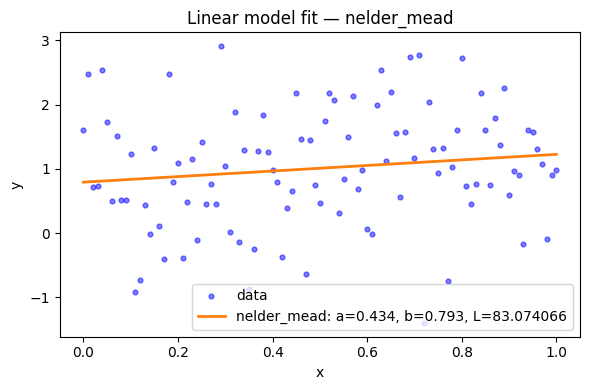

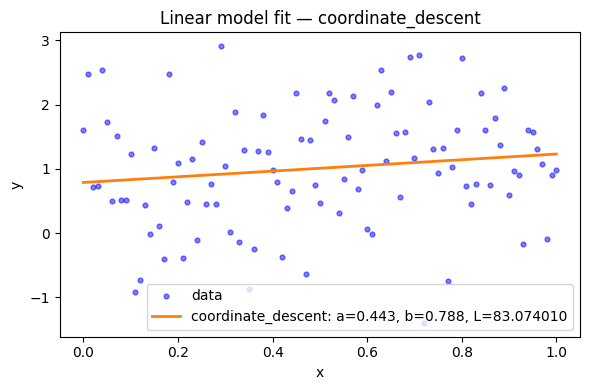

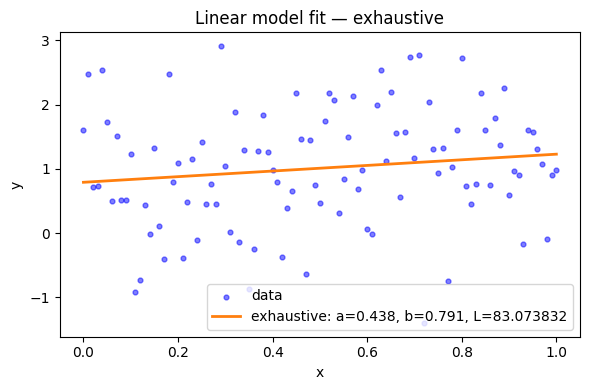

In [132]:
methods = ['nelder_mead', 'coordinate_descent', 'exhaustive']
a_estimates = [a_best_nelder, a_best_co_des, a_best_ex]
b_estimates = [b_best_nelder, b_best_co_des, b_best_ex]
losses = [L_best_nelder, L_best_co_des, L_best_ex]

for method, a_est, b_est, L in zip(methods, a_estimates, b_estimates, losses):
    plt.figure(figsize=(6,4))
    plt.scatter(x, y, s=12, color='b', alpha=0.5, label='data')
    plt.plot(x, linear_model(x, a_est, b_est), color='C1', lw=2,
             label=f"{method}: a={a_est:.3f}, b={b_est:.3f}, L={L:.6f}")
    plt.title(f"Linear model fit — {method}")
    plt.xlabel("x"); plt.ylabel("y")
    plt.legend(); plt.tight_layout()
    plt.show()


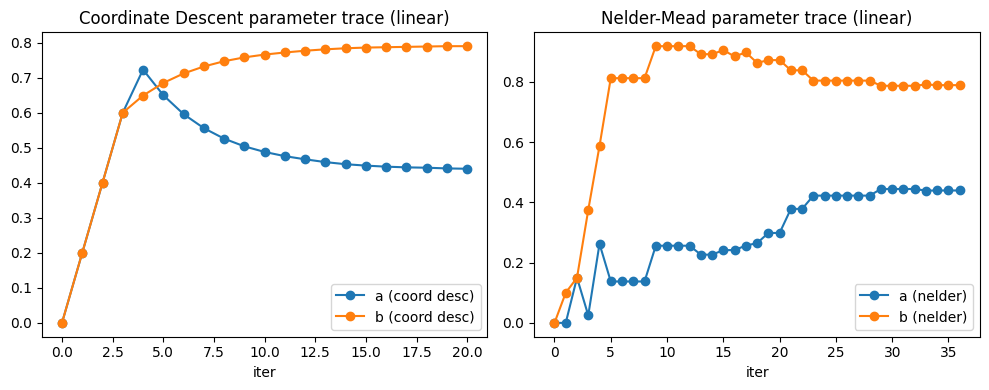

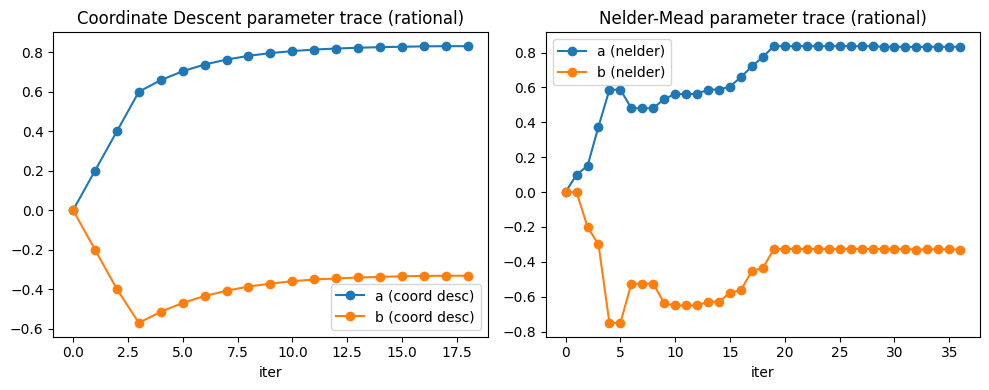

In [133]:
eps=1e-3
def coordinate_descent_trace(f, x, y, init_a, init_b, eps=1e-3, window=0.2, max_iters=200):
    a, b = init_a, init_b
    a_trace = [a]; b_trace = [b]
    for it in range(max_iters):
        a_grid = np.arange(a - window, a + window + eps, eps)
        vals = [loss(f, aa, b, x, y) for aa in a_grid]
        a_new = a_grid[int(np.argmin(vals))]
        a = a_new; a_trace.append(a)
        b_grid = np.arange(b - window, b + window + eps, eps)
        vals = [loss(f, a, bb, x, y) for bb in b_grid]
        b_new = b_grid[int(np.argmin(vals))]
        b = b_new; b_trace.append(b)
        if abs(a_trace[-1] - a_trace[-2]) <= eps and abs(b_trace[-1] - b_trace[-2]) <= eps:
            break
    return np.array(a_trace), np.array(b_trace)

def nelder_mead_trace(f, arr, x, y, tol=1e-3, max_iter=200):
    simplex = [np.array(arr), np.array(arr)+np.array([0.1,0.0]), np.array(arr)+np.array([0.0,0.1])]
    trace = [simplex[0].copy()]
    for it in range(max_iter):
        L = np.array([loss(f,p[0],p[1],x,y) for p in simplex])
        idx = np.argsort(L)
        simplex = [simplex[i] for i in idx]
        p_best, p_mid, p_worst = simplex
        xc = (p_best + p_mid)/2
        xr = xc + (xc - p_worst)
        fr = loss(f, xr[0], xr[1], x, y)
        if fr < L[idx[0]]:
            xe = xc + 2*(xr - xc)
            fe = loss(f, xe[0], xe[1], x, y)
            simplex[2] = xe if fe < fr else xr
        elif L[idx[0]] <= fr < L[idx[1]]:
            simplex[2] = xr
        else:
            xs = p_best + 0.5*(simplex[2] - p_best)
            fs = loss(f, xs[0], xs[1], x, y)
            if fs < L[idx[2]]:
                simplex[2] = xs
            else:
                simplex[1] = p_best + 0.5*(simplex[1] - p_best)
                simplex[2] = p_best + 0.5*(simplex[2] - p_best)
        trace.append(simplex[0].copy())
        pts = np.vstack(simplex)
        if np.max(np.std(pts, axis=0)) < tol:
            break
    tr = np.array(trace)
    return tr[:,0], tr[:,1]

# Get traces and plot for linear model
a_tr_cd_lin, b_tr_cd_lin = coordinate_descent_trace(linear_model, x, y, a0, b0, eps=eps)
a_tr_nm_lin, b_tr_nm_lin = nelder_mead_trace(linear_model, [a0,b0], x, y)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(a_tr_cd_lin, '-o', label='a (coord desc)')
plt.plot(b_tr_cd_lin, '-o', label='b (coord desc)')
plt.title("Coordinate Descent parameter trace (linear)")
plt.xlabel("iter"); plt.legend()

plt.subplot(1,2,2)
plt.plot(a_tr_nm_lin, '-o', label='a (nelder)')
plt.plot(b_tr_nm_lin, '-o', label='b (nelder)')
plt.title("Nelder-Mead parameter trace (linear)")
plt.xlabel("iter"); plt.legend()
plt.tight_layout(); plt.show()

# Get traces and plot for rational model
a_tr_cd_rat, b_tr_cd_rat = coordinate_descent_trace(rational_model, x, y, a0, b0, eps=eps)
a_tr_nm_rat, b_tr_nm_rat = nelder_mead_trace(rational_model, [a0,b0], x, y)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(a_tr_cd_rat, '-o', label='a (coord desc)')
plt.plot(b_tr_cd_rat, '-o', label='b (coord desc)')
plt.title("Coordinate Descent parameter trace (rational)")
plt.xlabel("iter"); plt.legend()

plt.subplot(1,2,2)
plt.plot(a_tr_nm_rat, '-o', label='a (nelder)')
plt.plot(b_tr_nm_rat, '-o', label='b (nelder)')
plt.title("Nelder-Mead parameter trace (rational)")
plt.xlabel("iter"); plt.legend()
plt.tight_layout(); plt.show()


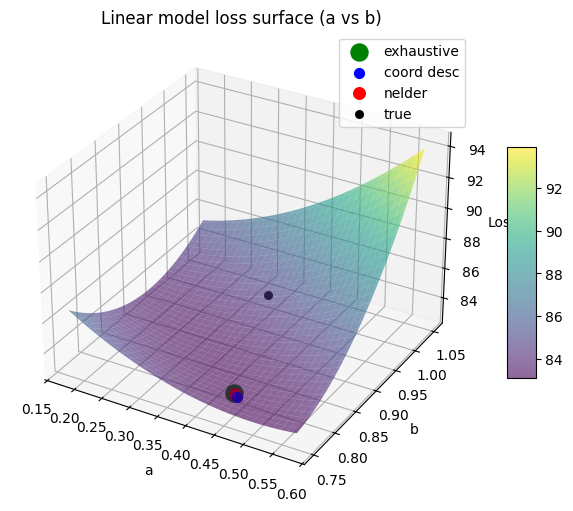

In [134]:
from mpl_toolkits.mplot3d import Axes3D

A = np.linspace(alpha-0.2, alpha+0.2, 101)
B = np.linspace(beta-0.2, beta+0.1, 101)
AA, BB = np.meshgrid(A, B)
ZZ = np.zeros_like(AA)
for i in range(AA.shape[0]):
    for j in range(AA.shape[1]):
        ZZ[i,j] = loss(linear_model, AA[i,j], BB[i,j], x, y)


fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(AA, BB, ZZ, cmap='viridis', linewidth=0, antialiased=True, alpha=0.6)
# Markers for found estimates and true params
ax.scatter(a_estimates[0], b_estimates[0] , losses[0], color='green', s=150, label='exhaustive')
ax.scatter(a_estimates[1], b_estimates[1] , losses[1], color='blue', s=50, label='coord desc')
ax.scatter(a_estimates[2], b_estimates[2] , losses[2], color='red', s=70, label='nelder')
ax.scatter([alpha], [beta], [loss(linear_model, alpha, beta, x, y)], color='black', s=30, label='true')
ax.set_xlabel('a'); ax.set_ylabel('b'); ax.set_zlabel('Loss')
plt.title("Linear model loss surface (a vs b)")
plt.legend(); fig.colorbar(surf, shrink=0.5, aspect=8)
plt.show()
